Global average probability (%): 16%


<Figure size 432x288 with 0 Axes>

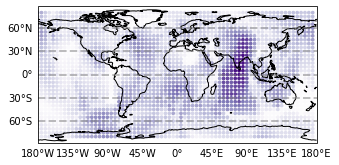

In [49]:
import numpy as np
import pickle
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

jerk_number = 0
# jerk times as defined in catalogue
jerk_times = [4605,5750,2920, 1915, 6450,7295,7620,7844,8878,9673,10593,12619,13412,13543]
# sample every year
time_yearly = np.arange(jerk_times[jerk_number]-200,jerk_times[jerk_number]+200+1)
times_hist_bin = np.arange(jerk_times[jerk_number]-200,jerk_times[jerk_number]+200) + 0.5
t0 = jerk_times[jerk_number]
f_size = 16  # fontsize for figure

filename = "Jerk"+str(jerk_number+1)+"_5x5_20M.results"
with open(filename, "rb") as fp:   # Unpickling
     results = pickle.load(fp)

# make plot of the max probability of a jerks over a window of t0 +/- 25 years

y_theta, y_phi,y_prob = [],[],[]

for j in range(len(results)):
    theta = results[j][0]
    phi = results[j][1]
    component = results[j][2]
    CP = results[j][3]
    
    if component == 1:
        y_theta.append(theta); y_phi.append(phi)
        y_prob.append ( CP[(times_hist_bin <= t0+25) & (times_hist_bin >= t0-25) ].max() )
    
cmap = plt.get_cmap('Purples')
plt.figure()
axes = [0]
f, axes[0] = plt.subplots(nrows=1, ncols=1, figsize=(5,10),subplot_kw={'projection': ccrs.PlateCarree() }) 
y_prob = np.array(y_prob)
marker_size = 7. 


i=0   
cax = axes[i].scatter(y_phi,90.-np.array(y_theta), s = marker_size, c=y_prob,cmap=cmap, vmin=0, vmax=y_prob.max())
gl = axes[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True, 
              linewidth=2, color='gray', alpha=0.5, linestyle='--')
    
axes[i].coastlines()

gl.top_labels = False
gl.right_labels = False
gl.xlines = False
gl.xlocator = mticker.FixedLocator([-180, -135., -90, -45., 0, 45., 90, 135., 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


outfname = 'Jerk_prob_map_'+str(jerk_number+1)+ '_5x5_20M'
f.savefig(outfname + '.pdf',bbox_inches = 'tight')
f.savefig(outfname + '.png',bbox_inches = 'tight')

print('Global average probability (%): {0:.0f}%'.format(np.sum(y_prob)/len(y_prob)*100 ))
np.savetxt('jerk_finder_event' + str(jerk_number+1) +'.txt',np.vstack((y_theta, y_phi, y_prob)).T, fmt='%d %d %.4f')
